In [1]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
import get_all_tickers.get_tickers as gt
import yfinance as yf

In [2]:
price_data = pd.read_csv("../relevant_price_data_2019-2020.csv", index_col=0)
fundamental_data = pd.read_csv("../relevant_fundamentals.csv", index_col=0)

C:\Users\Leonhard\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Add new columns : BE/ME and OP

In [3]:
missing_values = fundamental_data[(fundamental_data.mar_cap == 0)] # missing values
missing_values["beme"] = np.nan # replaced with NaN
d = fundamental_data.drop(missing_values.index) # dropped so that I can calculate the BEME
d["beme"] = d["at"]/d["mar_cap"]
fundamental_data = d.append(missing_values)
fundamental_data.reset_index(drop=True, inplace = True)
fundamental_data

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,at,ebit,mar_cap,beme
0,DDD,7.072820e+08,-7.446000e+06,8.801668e+08,0.803577
1,MMM,4.539000e+10,1.928000e+09,9.886729e+10,0.459100
2,WBAI,5.690690e+08,-5.233700e+07,1.281445e+08,4.440839
3,EGHT,6.872440e+08,-3.309800e+07,2.008404e+09,0.342184
4,AHC,1.292670e+08,-1.194000e+06,2.841195e+07,4.549741
...,...,...,...,...,...
5274,SOHON,4.662090e+08,-7.272725e+06,0.000000e+00,NaN
5275,SOHOO,4.662090e+08,-7.272725e+06,0.000000e+00,NaN
5276,SPKEP,3.611280e+08,2.915400e+07,0.000000e+00,NaN
5277,WHLRD,4.743380e+08,4.849000e+06,0.000000e+00,NaN


In [4]:
missing_values = fundamental_data[(fundamental_data.ebit == 0)] # missing values
missing_values["op"] = np.nan # replaced with NaN
d = fundamental_data.drop(missing_values.index) # dropped so that I can calculate the BEME
d["op"] = d["ebit"]/d["at"]
fundamental_data = d.append(missing_values)
fundamental_data.reset_index(drop=True, inplace = True)
fundamental_data

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,at,ebit,mar_cap,beme,op
0,DDD,7.072820e+08,-7.446000e+06,8.801668e+08,0.803577,-0.010528
1,MMM,4.539000e+10,1.928000e+09,9.886729e+10,0.459100,0.042476
2,WBAI,5.690690e+08,-5.233700e+07,1.281445e+08,4.440839,-0.091970
3,EGHT,6.872440e+08,-3.309800e+07,2.008404e+09,0.342184,-0.048160
4,AHC,1.292670e+08,-1.194000e+06,2.841195e+07,4.549741,-0.009237
...,...,...,...,...,...,...
5274,EVBN,2.056993e+09,0.000000e+00,1.393415e+08,14.762238,NaN
5275,IMH,2.469308e+09,0.000000e+00,3.163255e+07,78.062246,NaN
5276,PRK,9.240006e+09,0.000000e+00,1.673021e+09,5.522946,NaN
5277,SACH,1.696320e+08,0.000000e+00,9.093293e+07,1.865463,NaN


### Momentum

In [105]:
start = "2019-07-23"
today = "2020-07-23"

In [106]:
date_data = price_data[price_data.date == start]
today_data = price_data[price_data.date == today]

In [107]:
momentum_list = []
mom_ticker_list = []
for ticker in date_data.ticker:
    try:
        date_price = date_data[date_data.ticker == ticker][:1]["adjclose"].item()
        today_price = today_data[today_data.ticker == ticker][:1]["adjclose"].item()
        momentum = today_price - date_price
        momentum_list.append(momentum)
        mom_ticker_list.append(ticker)
    except:
        pass

In [108]:
df = pd.DataFrame({
    "ticker" : mom_ticker_list,
    "momentum" : momentum_list
})

df = df.sort_values(by = "momentum", ascending = False)
df.reset_index(drop = True, inplace = True)
momentum_stocks = df[:30]["ticker"].to_list()

In [109]:
value_stocks_df = fundamental_data.sort_values(by = "beme", ascending = False)
profit_stocks_df = fundamental_data.sort_values(by = "op", ascending = False)

In [110]:
value_stocks = value_stocks_df[:30]["ticker"].to_list()

In [111]:
profit_stocks = profit_stocks_df[:30]["ticker"].to_list()

In [112]:
print(momentum_stocks, value_stocks, profit_stocks)

['PTRS', 'AMZN', 'SHOP', 'CABO', 'CMG', 'GOOG', 'GOOGL', 'MELI', 'NVR', 'REGN', 'SAM', 'DXCM', 'TSLA', 'EQIX', 'NVDA', 'BIO', 'QDEL', 'TTD', 'STMP', 'NFLX', 'RH', 'ASML', 'COUP', 'RNG', 'ZM', 'CHTR', 'TDOC', 'MSCI', 'ISRG', 'LRCX'] ['AVAL', 'WF', 'SHG', 'CIB', 'KB', 'ITCB', 'TLK', 'TSCAP', 'KT', 'BSAC', 'MFG', 'EC', 'MUFG', 'SMFG', 'SHIPW', 'PKX', 'BCH', 'CRESY', 'NMR', 'IRS', 'ENIC', 'SUPV', 'EDN', 'YPF', 'CCU', 'BBAR', 'GGAL', 'IX', 'BMA', 'PAM'] ['SBR', 'NRT', 'PBT', 'MSB', 'BPMC', 'SINO', 'WINA', 'VYGR', 'FLGT', 'UI', 'QDEL', 'SIGA', 'CODX', 'SGEN', 'MED', 'GBL', 'APT', 'BWMX', 'RVP', 'DVD', 'GRVY', 'STEP', 'OSB', 'SJ', 'BTG', 'CIH', 'NLS', 'LESL', 'LPX', 'GPP']


In [113]:
import pandas as pd
import random
import yahoo_fin.stock_info as si
import yfinance as yf
import json
import csv
import re
from io import StringIO
from bs4 import BeautifulSoup
import requests
import get_all_tickers.get_tickers as gt
from lxml import html
import matplotlib.pyplot as plt

## Scrape Sector and Country to diversify

Create Dataframes

1. Value Stocks

In [114]:
name_list = []

for ticker in value_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in value_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        page = requests.get(url.format(ticker, ticker))
        tree = html.fromstring(page.content)
        country = tree.xpath('//div[@data-reactid=7]/p/text()[3]')[0].strip()

        country_list.append(country)
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in value_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

value_df = pd.DataFrame({
    "ticker" : value_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

2. Momentum Stocks

In [115]:
name_list = []

for ticker in momentum_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in momentum_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        page = requests.get(url.format(ticker, ticker))
        tree = html.fromstring(page.content)
        country = tree.xpath('//div[@data-reactid=7]/p/text()[3]')[0].strip()

        country_list.append(country)
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in momentum_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

momentum_df = pd.DataFrame({
    "ticker" : momentum_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

3. Profit Stocks

In [116]:
name_list = []

for ticker in profit_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in profit_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        page = requests.get(url.format(ticker, ticker))
        tree = html.fromstring(page.content)
        country = tree.xpath('//div[@data-reactid=7]/p/text()[3]')[0].strip()

        country_list.append(country)
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in profit_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = BeautifulSoup(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

profit_df = pd.DataFrame({
    "ticker" : profit_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

# Now lets form a diversified Portfolio

### It should consist of 20 stocks, diversified over industry and country.

In [117]:
# industreis
combined_df = pd.concat([momentum_df, value_df, profit_df], axis = 0)
unique_industries = combined_df.industry.unique()

In [126]:
portfolio_df = pd.DataFrame(columns=["ticker", "names", "industry", "country"])
index = 0
mom = 0
val = 0
pro = 0

while (len(portfolio_df) < 20) & (index < 20):
    
    try:
    
        if (momentum_df.loc[index]["industry"] not in portfolio_df.industry.to_list() or momentum_df.loc[index]["country"] not in portfolio_df.country.to_list()) and mom <=5 and portfolio_df[portfolio_df.industry == momentum_df.loc[index]["industry"]]["industry"].count() <= 1:
            portfolio_df = portfolio_df.append(momentum_df.loc[index])
            mom += 1

        elif (value_df.loc[index]["industry"] not in portfolio_df.industry.to_list() or value_df.loc[index]["country"] not in portfolio_df.country.to_list()) and val <= 5 and portfolio_df[portfolio_df.industry == value_df.loc[index]["industry"]]["industry"].count() <= 1:
            portfolio_df = portfolio_df.append(value_df.loc[index])
            val += 1

        elif (profit_df.loc[index]["industry"] not in portfolio_df.industry.to_list() or profit_df.loc[index]["country"] not in portfolio_df.country.to_list()) and pro <= 5 and portfolio_df[portfolio_df.industry == value_df.loc[index]["industry"]]["industry"].count() <= 1:
            portfolio_df = portfolio_df.append(profit_df.loc[index])
            pro += 1

        else:
            index += 1
    except:
        index += 1

In [140]:
portfolio_df = pd.DataFrame(columns=["ticker", "names", "industry", "country"])
index = 0
mom = 0
val = 0
pro = 0
origin_list = [] # list for the origins of the stocks

while (len(portfolio_df) < 20) & (index < 20):
    
    try:
        if portfolio_df[portfolio_df.industry == momentum_df.loc[index]["industry"]]["industry"].count() <= 1 and mom <= 5:
            portfolio_df = portfolio_df.append(momentum_df.loc[index])
            index += 1
            mom += 1
            origin_list.append("mom")
        if portfolio_df[portfolio_df.industry == value_df.loc[index]["industry"]]["industry"].count() <= 1 and val <= 5:
            portfolio_df = portfolio_df.append(value_df.loc[index])
            index += 1
            val += 1
            origin_list.append("val")
        if portfolio_df[portfolio_df.industry == profit_df.loc[index]["industry"]]["industry"].count() <= 1 and pro <= 5:
            portfolio_df = portfolio_df.append(profit_df.loc[index])
            index += 1
            pro += 1
            origin_list.append("pro")
    
        
        else:
            index += 1
    except:
        index += 1
    
portfolio_df["origin"] = origin_list
portfolio_df

,ticker,names,industry,country,origin
0,PTRS,Partners Bancorp,Financial Services,United States,mom
1,WF,Woori Financial Group Inc.,Financial Services,Seoul,val
2,PBT,Permian Basin Royalty Trust,Energy,"Dallas, TX 75219",pro
3,CABO,"Cable One, Inc.",Communication Services,United States,mom
4,BPMC,Blueprint Medicines Corporation,Healthcare,United States,pro
5,GOOG,Alphabet Inc.,Communication Services,United States,mom
6,WINA,Winmark Corporation,Consumer Cyclical,"Minneapolis, MN 55441",pro
7,MELI,"MercadoLibre, Inc.",Consumer Cyclical,Buenos Aires C1430CRG,mom
8,FLGT,"Fulgent Genetics, Inc.",Healthcare,"Temple City, CA 91780",pro
9,UI,Ubiquiti Inc.,Technology,"New York, NY 10017",pro


In [141]:
portfolio_df.reset_index(drop=True, inplace = True)


## Get live prices

In [142]:
live_prices = []

for tick in portfolio_df.ticker:
    t = si.get_live_price(tick)
    print(t)
    live_prices.append(t)
    
portfolio_df["live_price"] = live_prices

3075.0
27.09000015258789
2.759999990463257
2009.5799560546875
97.6500015258789
1742.18994140625
178.39999389648438
1416.989990234375
43.0
245.63999938964844
938.2999877929688
11.869999885559082
728.1199951171875
0.020099999383091927
12.65999984741211
3.8399999141693115
4.650000095367432


If we invested amount x, what are the fractions of the shares we would have to buy if we wanted to equally weight the stocks?

In [143]:
investment = 1000#float(input("How much do we want to invest?"))

fraction_list = []

for price in live_prices:
    fraction = investment/(len(live_prices))/price
    fraction_list.append(fraction)
    
portfolio_df["fraction"] = fraction_list

In [144]:
portfolio_df = portfolio_df[1:]

## Get historical return of the portfolio

get spy data as benchmark and portfolio content data


In [145]:
today = "2020-11-19"
start = "2020-02-08"

In [146]:
port_data = pd.DataFrame()

for ticker in portfolio_df.ticker:
    try:
        stock_df = si.get_data(ticker, start_date = start, end_date = today)[[ "adjclose", "ticker"]]
        port_data = port_data.append(stock_df)
    except:
        pass

spy = si.get_data("spy", start_date = start, end_date = today)[["adjclose", "ticker"]]

calculate returns 

In [147]:
unique_tickers = port_data.ticker.unique()
data_df_list = []
for ticker in unique_tickers:
    return_list = [np.nan]
    ticker_df = port_data[port_data.ticker == ticker]
    n = 1
    ticker_df.reset_index(drop = True, inplace = True)
    while n <= len(ticker_df) - 1:
        day_ret = ((ticker_df.loc[n]["adjclose"] - ticker_df.loc[n-1]["adjclose"])/ticker_df.loc[n-1]["adjclose"]) * 100
        return_list.append(day_ret)
        n += 1
    ticker_df["returns"] = return_list
    data_df_list.append(ticker_df)
    

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [148]:
rets = []
for adj1, adj2 in zip(spy["adjclose"], spy.shift()["adjclose"]):
    ret = ((adj1 - adj2)/adj2) * 100
    rets.append(ret)

spy["day_ret"] = rets

In [149]:
kum_ret = []
n = 1
while n <= len(spy):
    ret = spy.day_ret[:n].sum()
    kum_ret.append(ret)
    n += 1
spy["kum_ret"] = kum_ret

In [150]:
for df in data_df_list:
    kum_ret = []
    n = 1
    while n <= len(df):
        ret = df.returns[:n].sum()
        kum_ret.append(ret)
        n += 1
    df["kum_ret"] = kum_ret

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
n = 0
kum_port_rets = []
while n < len(spy):
    rets = [data_df_list[m].loc[n]["kum_ret"] for m in range(len(data_df_list))]
    kum_port_ret = sum(rets)/len(data_df_list)
    kum_port_rets.append(kum_port_ret)
    n += 1

#### Add the returns to spy dataframe so we can compare them

In [152]:
spy["port_kum_rets"] = kum_port_rets

#### Plot the kum rets and compare them

Text(0.5, 1.0, 'SPY vs my Portfolio')

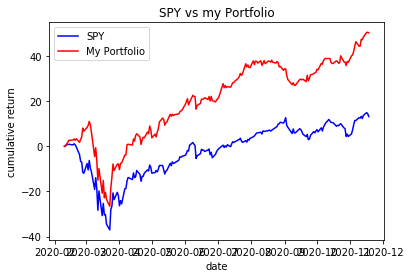

In [153]:
plt.plot(spy.index, spy.kum_ret, "blue", label = "SPY")
plt.plot(spy.index, spy.port_kum_rets, "red", label = "My Portfolio")
plt.legend()
plt.xlabel("date")
plt.ylabel("cumulative return")
plt.title("SPY vs my Portfolio")